In [ ]:
"""
UNIVERSITY OF ARIZONA
Author: LU
Feb 2021
Description: Script to segment WMH on a pre processed 3D FLAIR volume (isotropic resolution) using Orthogonal Nets. 
An ensemble of three DeepUNET3D CNNs are used to predict WMHs on axial, sagittal, and coronal reformatting of 3D FLAIR volumes
The WMH posteriors can be combined using averaging, maajority voting. or stacked generalization using a Meta CNN
For additional information on architecture/details or to cite this work, please refer to the following publication:
Umapathy, L., G. G. Perez-Carrillo, M. B. Keerthivasan, J. A. Rosado-Toro, M. I. Altbach, B. Winegar, 
C. Weinkauf, A. Bilgin, and Alzheimer’s Disease Neuroimaging Initiative. 
"A Stacked Generalization of 3D Orthogonal Deep Learning Convolutional Neural Networks for 
Improved Detection of White Matter Hyperintensities in 3D FLAIR Images." American Journal of Neuroradiology, 2021 (http://doi.org/10.3174/ajnr.A6970).

"""

In [2]:
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from Model_setup import setTF_environment
from utils import load3DFLAIR

In [3]:
warnings.filterwarnings('ignore')
setTF_environment('6')

In [4]:
'''
Enter path of a pre-processed nifti volume. The nifti volume is expected to be brain-extracted and/or bias-corrected
'''
nii_fileName = './sample3DFLAIR.nii.gz'

img = load3DFLAIR(nii_fileName)


Loading nifti volume...
Sagittal dim detected. Converting to axial
Denoising...
Contrast stretching...


(-0.5, 159.5, 255.5, -0.5)

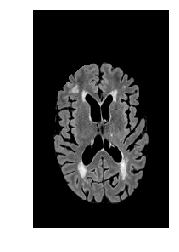

In [5]:
sliceIdx = 146
plt.imshow(img[...,sliceIdx], cmap='gray')
plt.axis('off')

In [6]:
# instantiate Stacked Generalization ensemble of Orthogonal CNNs with pretrained weights
from SGNet import SGNet
model_loadPath = "./Pretrained_models/"
SGNet = SGNet(model_loadPath)

In [7]:
# Individual CNN predictions

wmh_axial, wmh_sag, wmh_cor = SGNet.predictOrthogonalNets(img)

Creating Axial test volume for Orthogonal Net
Creating Sagittal test volume for Orthogonal Net
Creating Coronal test volume for Orthogonal Net
Reformatting Axial prediction from Orthogonal Net: 
Reformatting Sagittal prediction from Orthogonal Net: 
Reformatting Coronal prediction from Orthogonal Net: 


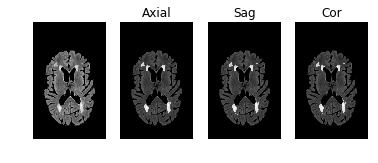

In [8]:
plt.subplot(1,4,1)
plt.imshow(img[...,sliceIdx], cmap='gray')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(img[...,sliceIdx],cmap='gray')
plt.imshow(wmh_axial[...,sliceIdx], cmap='gray',alpha=0.4)
plt.title('Axial')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(img[...,sliceIdx],cmap='gray')
plt.imshow(wmh_sag[...,sliceIdx], cmap='gray',alpha=0.4)
plt.title('Sag')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img[...,sliceIdx],cmap='gray')
plt.imshow(wmh_cor[...,sliceIdx], cmap='gray',alpha=0.4)
plt.title('Cor')
plt.axis('off')
plt.show()

In [9]:
# Averaging ensemble predictions (averages posteriors from individual orthogonal CNNs)

wmh_avg = SGNet.predict_averageEnsemble(img)

Creating Axial test volume for Orthogonal Net
Creating Sagittal test volume for Orthogonal Net
Creating Coronal test volume for Orthogonal Net
Reformatting Axial prediction from Orthogonal Net: 
Reformatting Sagittal prediction from Orthogonal Net: 
Reformatting Coronal prediction from Orthogonal Net: 
Averaging Orthogonal posteriors...
Time Elapsed :  24.84088897705078


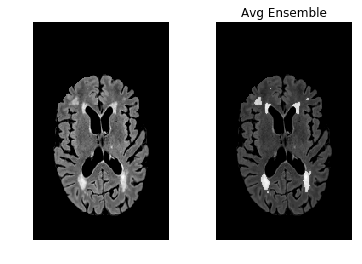

In [10]:
plt.subplot(1,2,1)
plt.imshow(img[...,sliceIdx],cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img[...,sliceIdx],cmap='gray')
plt.imshow(wmh_avg[...,sliceIdx], cmap='gray',alpha=0.4)
plt.title('Avg Ensemble')
plt.axis('off')
plt.show()

In [11]:
# Majority vote of posteriors from individual orthogonal CNNs

wmh_mv = SGNet.predict_MVEnsemble(img)

Creating Axial test volume for Orthogonal Net
Creating Sagittal test volume for Orthogonal Net
Creating Coronal test volume for Orthogonal Net
Reformatting Axial prediction from Orthogonal Net: 
Reformatting Sagittal prediction from Orthogonal Net: 
Reformatting Coronal prediction from Orthogonal Net: 
Majority voting Orthogonal predictions...
Time Elapsed :  25.163109302520752


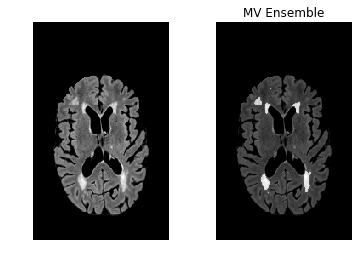

In [13]:
plt.subplot(1,2,1)
plt.imshow(img[...,sliceIdx],cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img[...,sliceIdx],cmap='gray')
plt.imshow(wmh_mv[...,sliceIdx], cmap='gray',alpha=0.4)
plt.title('MV Ensemble')
plt.axis('off')
plt.show()

In [14]:
# Stacked generalization Ensemble of Orthogonal CNNs

wmh_sg = SGNet.predict_StackGenNet(img)

Creating Axial test volume for Orthogonal Net
Creating Sagittal test volume for Orthogonal Net
Creating Coronal test volume for Orthogonal Net
Reformatting Axial prediction from Orthogonal Net: 
Reformatting Sagittal prediction from Orthogonal Net: 
Reformatting Coronal prediction from Orthogonal Net: 
Meta classification in progress..
Creating input for Meta CNN...
Time Elapsed :  26.654730796813965


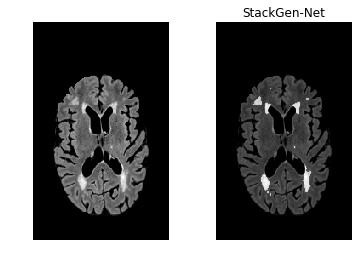

In [15]:
plt.subplot(1,2,1)
plt.imshow(img[...,sliceIdx],cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img[...,sliceIdx],cmap='gray')
plt.imshow(wmh_sg[...,sliceIdx], cmap='gray',alpha=0.4)
plt.title('StackGen-Net')
plt.axis('off')
plt.show()